In [2]:
#Predicting the price of a stock using Long Term Short Memory using 60 days data

In [15]:
import math
import pandas_datareader as web #API Not Working
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import datetime

In [34]:
df = pd.read_csv("/content/AAPL.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-17,15.150000,15.213929,15.105714,15.167857,12.857485,242897200
1,2012-01-18,15.248571,15.338214,15.225000,15.325357,12.990997,276791200
2,2012-01-19,15.362500,15.406071,15.232500,15.276786,12.949821,261738400
3,2012-01-20,15.267500,15.267857,14.991071,15.010714,12.724276,413974400
4,2012-01-23,15.095357,15.301786,15.082143,15.264643,12.939530,306062400
...,...,...,...,...,...,...,...
3014,2024-01-09,183.919998,185.149994,182.729996,185.139999,185.139999,42841800
3015,2024-01-10,184.350006,186.399994,183.919998,186.190002,186.190002,46792900
3016,2024-01-11,186.539993,187.050003,183.619995,185.589996,185.589996,49128400
3017,2024-01-12,186.059998,186.740005,185.190002,185.919998,185.919998,40444700


In [24]:
#Understand the structure of the data
df.shape

(3019, 7)

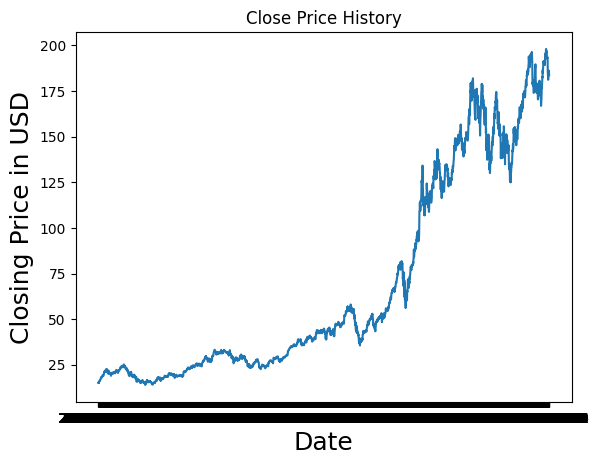

In [33]:
#Visualise the closing price history
plt.title('Close Price History')
plt.plot(df['Date'],df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing Price in USD',fontsize=18)
plt.show()

In [62]:
#Create new df only with Close column
data = df['Close']
#Create data to numpy array
dataset = data.values
#Convert dataset to 2D array as fit_transform takes in 2D array as input
dataset = dataset.reshape(-1,1)
#print(dataset)
#print(dataset.shape)
#Get the number of rows to train the data on
training_data_len = math.ceil(len(dataset)*0.8)

0        15.167857
1        15.325357
2        15.276786
3        15.010714
4        15.264643
           ...    
3014    185.139999
3015    186.190002
3016    185.589996
3017    185.919998
3018    183.630005
Name: Close, Length: 3019, dtype: float64
[[ 15.167857]
 [ 15.325357]
 [ 15.276786]
 ...
 [185.589996]
 [185.919998]
 [183.630005]]
(3019, 1)


In [64]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00662652],
       [0.00748175],
       [0.00721801],
       ...,
       [0.93201653],
       [0.93380844],
       [0.92137381]])

In [66]:
#Create training data set - past 60 days dataset
train_data = scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train dataset
x_train = [] #independent training features
y_train = [] #target variables
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <=61:
    print(x_train)
    print(y_train)
    print()

[array([0.00662652, 0.00748175, 0.00721801, 0.00577324, 0.00715207,
       0.00579457, 0.01088519, 0.01049151, 0.01100542, 0.01211663,
       0.01278955, 0.01273332, 0.01252582, 0.01341013, 0.01424207,
       0.01518457, 0.01670691, 0.01990478, 0.01995326, 0.02173353,
       0.02306387, 0.02077747, 0.02165789, 0.02164044, 0.02410915,
       0.02375813, 0.02440779, 0.02557523, 0.0262249 , 0.02809631,
       0.02945961, 0.02985329, 0.02999099, 0.02765997, 0.02709757,
       0.02718097, 0.02937236, 0.02998905, 0.03131358, 0.03443582,
       0.03860139, 0.0378218 , 0.03782374, 0.04083544, 0.04177794,
       0.04110694, 0.04049413, 0.03985611, 0.04197573, 0.0434302 ,
       0.04403914, 0.04253425, 0.04053485, 0.044235  , 0.04630809,
       0.04533651, 0.04715363, 0.04764814, 0.04613744, 0.04570304])]
[0.045037860340526106]

[array([0.00662652, 0.00748175, 0.00721801, 0.00577324, 0.00715207,
       0.00579457, 0.01088519, 0.01049151, 0.01100542, 0.01211663,
       0.01278955, 0.01273332, 0.0

In [71]:
#Convert x_train and y_train to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

In [72]:
#Reshape the data - convert 2d array to 3d array as LSTM models take in 3d array as input
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_train.shape

(2356, 60, 1)

In [73]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [75]:
#Compile the Model
model.compile(optimizer='adam',loss='mean_squared_error')

In [76]:
#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

2356/2356 [==============================] - 83s 34ms/step - loss: 7.4910e-04


In [79]:
#Create the testing data set
test_data = scaled_data[training_data_len-60:,:]
#Create the datasets x_test, y_test
x_test = []
y_test = dataset[training_data_len:,:] #values that we want the model to predict
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [80]:
x_test = np.array(x_test)

In [81]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [83]:
#Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #Unscaling values

19/19 [==============================] - 2s 25ms/step


In [85]:
#Get the rmse - good measure of how accurately the model predicts the response
rmse = np.sqrt(np.mean((predictions-y_test)**2))
rmse

5.633607385546593

In [101]:
#Predict the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
print(valid)

2416                                                  149.710007
2417                                                  149.619995
2418                                                  148.360001
2419                                                  147.539993
2420                                                  148.600006
                                     ...                        
3015                                                  186.190002
3016                                                  185.589996
3017                                                  185.919998
3018                                                  183.630005
Predictions    [[146.74704], [146.89056], [147.0864], [147.17...
Name: Close, Length: 604, dtype: object


[
